In [1]:
import pandas as pd
import numpy as np

dataCatEneroTrain = pd.read_csv("por_mes_train_no_null_features_categorios-Final-train/df_no_null_features_train_enero.csv").drop(columns = "Unnamed: 0")
dataCatFebreroTrain = pd.read_csv("por_mes_train_no_null_features_categorios-Final-train/df_no_null_features_train_febrero.csv").drop(columns = "Unnamed: 0")
dataCatMarzoTrain = pd.read_csv("por_mes_train_no_null_features_categorios-Final-train/df_no_null_features_train_marzo.csv").drop(columns = "Unnamed: 0")
dataCatAbrilTrain = pd.read_csv("por_mes_train_no_null_features_categorios-Final-train/df_no_null_features_train_abril.csv").drop(columns = "Unnamed: 0")
dataCatMayoTrain = pd.read_csv("por_mes_train_no_null_features_categorios-Final-train/df_no_null_features_train_mayo.csv").drop(columns = "Unnamed: 0")
labels = pd.read_csv("labels_training_set.csv").drop(columns = "person")
persons = pd.read_csv("labels_training_set.csv").drop(columns = "label")

In [2]:
from xgboost.sklearn import XGBClassifier

dataCatEneroTest = pd.read_csv("por_mes_test_no_null_features_categorios-Final_test/df_no_null_features_test_final_enero.csv").drop(columns = "Unnamed: 0")
dataCatFebreroTest = pd.read_csv("por_mes_test_no_null_features_categorios-Final_test/df_no_null_features_test_final_febrero.csv").drop(columns = "Unnamed: 0")
dataCatMarzoTest = pd.read_csv("por_mes_test_no_null_features_categorios-Final_test/df_no_null_features_test_final_marzo.csv").drop(columns = "Unnamed: 0")
dataCatAbrilTest = pd.read_csv("por_mes_test_no_null_features_categorios-Final_test/df_no_null_features_test_final_abril.csv").drop(columns = "Unnamed: 0")
dataCatMayoTest = pd.read_csv("por_mes_test_no_null_features_categorios-Final_test/df_no_null_features_test_final_mayo.csv").drop(columns = "Unnamed: 0")

In [3]:
testSet = pd.read_csv("data/test_set_num_cat_no_null.csv").drop(columns = "Unnamed: 0")
print testSet.shape
testSet.head(10)

(19415, 2502)


,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,001001be,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0010e89a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0016c4b5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,001804a2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,001a2273,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [4]:
trocafone = testSet.iloc[:,:1]
print trocafone.shape
print testSet.shape
testSet = testSet.drop(columns = "person")
testSet.head(10)

(19415, 1)
(19415, 2502)


,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [5]:
trainSet = pd.read_csv("data/train_set_NOT_UNDER_num_cat_no_null.csv")#.drop(columns = "Unnamed: 0")
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


trainSet = pd.concat([persons, dataCatEneroTrain, dataCatFebreroTrain, dataCatMarzoTrain, dataCatAbrilTrain, dataCatMayoTrain,labels], axis=1, sort=False)

testSet = pd.concat([dataCatEneroTest, dataCatFebreroTest, dataCatMarzoTest, dataCatAbrilTest, dataCatMayoTest], axis=1, sort=False)

In [6]:
trainSet.shape

(19414, 2503)

#### SubMuestreo o undersample

0    18434
1      980
Name: label, dtype: int64


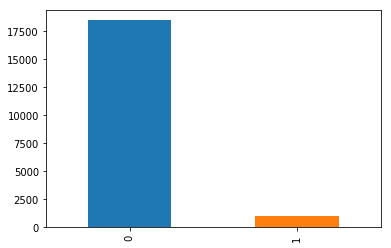

In [69]:
#Datos sin muestrear
import matplotlib.pyplot as plt
# graficos incrustados
%matplotlib inline
print trainSet['label'].value_counts()
trainSet['label'].value_counts().plot(kind= 'bar')

In [216]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(trainSet[trainSet['label'] == 1])*6 #80/20--4   70/30---2

In [217]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = trainSet[trainSet.label == 0].index 

In [218]:
#Muestras aleatorias de índices de no conversiones.
#GENERO SEMILLA CON 3 PORQUE SI, EN REALIDAD PORQUE BRINDA UN NUMERO BAJO COMO 46
np.random.seed(3)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [219]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = trainSet[trainSet.label == 1].index

In [220]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [221]:
#6 Obtener Balance Dataframe
under_sample = trainSet.loc[under_sample_indices]

In [222]:
under_sample = under_sample.sort_values(by='person')
under_sample['label'].value_counts()

0    5880
1     980
Name: label, dtype: int64

### Visualización de datos submuestreados

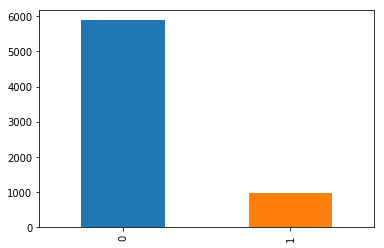

In [223]:
under_sample['label'].value_counts().plot(kind='bar')

In [224]:
print trainSet.shape
under_sample.shape
#dimensiones de trainset:(1960, 2503)

(19414, 2503)


(6860, 2503)

In [225]:

import xgboost as xgb
import random
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


Hiper-parámetros:

* **num_boost_round:** cantidad de árboles a contruir (n_estimators)
* **metrics:** la métrica de evaluación a utilizar

* **early_stopping_rounds:** terminar antes si la métrica no mejora luego de una cantidad de pasadas
* **seed:** semilla para poder reproducir los resultados

In [226]:
testSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0


### COMIENZA LA BUSQUEDA DE PARAMETROS

In [227]:
trainSet.shape

(19414, 2503)

In [253]:
#train = pd.read_csv('train_modified.csv')
#target = 'Disbursed'
#IDcol = 'ID'

train = under_sample#trainSet#pd.read_csv('train_modified.csv')
target = 'label'
IDcol = 'person'

In [254]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
    
#    for z in range(0,100):
#        print ('pos: ',z,dtrain['label'].values[z],'prediccion: ',dtrain_predictions[z],'modelo:',int(predict.round()[z]))
    #feat_imp = pd.Series(alg.booster().get_fscore())#.sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
    

In [255]:
def modelfit2(alg, dtrain, predictors,dtest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
    
#    for z in range(0,100):
#        print ('pos: ',z,dtrain['label'].values[z],'prediccion: ',dtrain_predictions[z],'modelo:',int(predict.round()[z]))
    #feat_imp = pd.Series(alg.booster().get_fscore())#.sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
    return dtest_predprob

In [256]:
from sklearn import metrics   #Additional scklearn functions

In [257]:
testSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0


In [258]:
#Choose all predictors except target & IDcols
train = under_sample#trainSet#pd.read_csv('train_modified.csv')
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=2,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.2,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6, #2940/980=3
 seed=1024)
modelfit(xgb1, train, predictors)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.7972
AUC Score (Train): 0.874469


In [259]:
testSet = pd.read_csv("data/test_set_num_cat_no_null.csv").drop(columns = "Unnamed: 0")
print testSet.shape
testSet.head(10)

(19415, 2502)


,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,001001be,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0010e89a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0016c4b5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,001804a2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,001a2273,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [260]:
train.columns

Index([u'person', u'Enero - cantidadEventos', u'Enero - checkouts',
       u'Enero - leads', u'Enero - conversiones',
       u'Enero - staticPageVisitadas', u'Enero - ProductosVistosPorUser',
       u'Enero - productosBuscados', u'Enero - accesos por marketing online',
       u'Enero - searchEngine',
       ...
       u'F13_region_fh82-Mayo', u'F13_region_fh83-Mayo',
       u'F13_region_fh84-Mayo', u'F13_region_fh85-Mayo',
       u'F13_device_type_fh1-Mayo', u'F13_device_type_fh2-Mayo',
       u'F13_device_type_fh3-Mayo', u'F13_device_type_fh4-Mayo',
       u'F13_device_type_fh5-Mayo', u'label'],
      dtype='object', length=2503)

In [261]:
testSet.columns

Index([u'person', u'Enero_cantEventos', u'Enero_checkouts', u'Enero_leads',
       u'Enero_conversiones', u'Enero_staticPageVisitadas',
       u'Enero_ProductosVistosPorUser', u'Enero_productosBuscados',
       u'Enero_accesos por marketing online', u'Enero_searchEngine',
       ...
       u'F13_region_fh81-Mayo', u'F13_region_fh82-Mayo',
       u'F13_region_fh83-Mayo', u'F13_region_fh84-Mayo',
       u'F13_region_fh85-Mayo', u'F13_device_type_fh1-Mayo',
       u'F13_device_type_fh2-Mayo', u'F13_device_type_fh3-Mayo',
       u'F13_device_type_fh4-Mayo', u'F13_device_type_fh5-Mayo'],
      dtype='object', length=2502)

In [262]:
prueba= train.columns
prueba=prueba.drop('label')
testSet.columns=prueba
testSet.columns

Index([u'person', u'Enero - cantidadEventos', u'Enero - checkouts',
       u'Enero - leads', u'Enero - conversiones',
       u'Enero - staticPageVisitadas', u'Enero - ProductosVistosPorUser',
       u'Enero - productosBuscados', u'Enero - accesos por marketing online',
       u'Enero - searchEngine',
       ...
       u'F13_region_fh81-Mayo', u'F13_region_fh82-Mayo',
       u'F13_region_fh83-Mayo', u'F13_region_fh84-Mayo',
       u'F13_region_fh85-Mayo', u'F13_device_type_fh1-Mayo',
       u'F13_device_type_fh2-Mayo', u'F13_device_type_fh3-Mayo',
       u'F13_device_type_fh4-Mayo', u'F13_device_type_fh5-Mayo'],
      dtype='object', length=2502)

In [263]:
predict_test=modelfit2(xgb1, train, predictors,testSet)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.7972
AUC Score (Train): 0.874469


In [264]:
modelo2#=predict_test.round()
modelo3=predict_test.round()

In [45]:
modelo1=predict_final.round()


In [265]:
abs(modelo2-modelo3).sum()

868.0

In [266]:
df_prueba=pd.DataFrame({'person':testSet['person']})#,'modelo1':modelo1,'modelo2':modelo2})
df_prueba['label']=predict_test
df_prueba.head(25)

,person,label
0,00091926,0.320275
1,00091a7a,0.778617
2,000ba417,0.519028
3,000e4d9e,0.400465
4,000e619d,0.507666
5,001001be,0.270289
6,0010e89a,0.113324
7,0016c4b5,0.089543
8,001804a2,0.214062
9,001a2273,0.085687


In [267]:
df_prueba.to_csv('submit_kaggle/sub10_modelo3_xGBoost.csv', index=False)

In [268]:
np.around(df_prueba['label']).value_counts()

0.0    14711
1.0     4704
Name: label, dtype: int64

In [49]:
np.around(df_prueba['label']).value_counts()

0.0    14161
1.0     5254
Name: label, dtype: int64

In [50]:
np.around(trocafone['label']).value_counts()

0.0    14218
1.0     5197
Name: label, dtype: int64

In [51]:
abs(modelo2-modelo1).sum()

1125.0

In [242]:
param_test0 = {
 'max_depth':[6],
 'min_child_weight':[3]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82995, std: 0.00350, params: {'max_depth': 6, 'min_child_weight': 3}],
 {'max_depth': 6, 'min_child_weight': 3},
 0.8299545328335416)

In [239]:
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(2,8,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84366, std: 0.00675, params: {'max_depth': 1, 'min_child_weight': 2},
  mean: 0.84345, std: 0.00700, params: {'max_depth': 1, 'min_child_weight': 4},
  mean: 0.84312, std: 0.00674, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.83270, std: 0.00599, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.83404, std: 0.00625, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.83395, std: 0.00593, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.82957, std: 0.00370, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.82705, std: 0.00391, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83110, std: 0.00617, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.83119, std: 0.00489, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.83037, std: 0.00359, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.82818, std: 0.00329, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.83322, std: 0.00504, params: {

In [245]:
param_test2 = {
 'max_depth':[2],
 'min_child_weight':[1,3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=1,
 min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83768, std: 0.00526, params: {'max_depth': 2, 'min_child_weight': 1},
  mean: 0.83706, std: 0.00522, params: {'max_depth': 2, 'min_child_weight': 3}],
 {'max_depth': 2, 'min_child_weight': 1},
 0.8376817818964319)

In [246]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,3)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83781, std: 0.00524, params: {'gamma': 0.0},
  mean: 0.83768, std: 0.00526, params: {'gamma': 0.1},
  mean: 0.83753, std: 0.00549, params: {'gamma': 0.2}],
 {'gamma': 0.0},
 0.8378119359988894)

In [247]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(2,10,2)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83688, std: 0.00565, params: {'subsample': 0.6, 'colsample_bytree': 0.2},
  mean: 0.83680, std: 0.00557, params: {'subsample': 0.7, 'colsample_bytree': 0.2},
  mean: 0.83871, std: 0.00674, params: {'subsample': 0.8, 'colsample_bytree': 0.2},
  mean: 0.83609, std: 0.00581, params: {'subsample': 0.9, 'colsample_bytree': 0.2},
  mean: 0.83559, std: 0.00541, params: {'subsample': 0.6, 'colsample_bytree': 0.4},
  mean: 0.83713, std: 0.00561, params: {'subsample': 0.7, 'colsample_bytree': 0.4},
  mean: 0.83706, std: 0.00502, params: {'subsample': 0.8, 'colsample_bytree': 0.4},
  mean: 0.83542, std: 0.00710, params: {'subsample': 0.9, 'colsample_bytree': 0.4},
  mean: 0.83423, std: 0.00575, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83405, std: 0.00591, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83513, std: 0.00447, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.83563, std: 0.00688, params: {'subsample': 0.9, 'colsample_bytree'

In [248]:
param_test5 = {
 'subsample':[i/100.0 for i in range(80,95,5)],
 'colsample_bytree':[i/100.0 for i in range(10,20,2)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.2,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83946, std: 0.00628, params: {'subsample': 0.8, 'colsample_bytree': 0.1},
  mean: 0.83797, std: 0.00571, params: {'subsample': 0.85, 'colsample_bytree': 0.1},
  mean: 0.83768, std: 0.00778, params: {'subsample': 0.9, 'colsample_bytree': 0.1},
  mean: 0.83930, std: 0.00712, params: {'subsample': 0.8, 'colsample_bytree': 0.12},
  mean: 0.83823, std: 0.00645, params: {'subsample': 0.85, 'colsample_bytree': 0.12},
  mean: 0.83851, std: 0.00623, params: {'subsample': 0.9, 'colsample_bytree': 0.12},
  mean: 0.83809, std: 0.00776, params: {'subsample': 0.8, 'colsample_bytree': 0.14},
  mean: 0.83682, std: 0.00567, params: {'subsample': 0.85, 'colsample_bytree': 0.14},
  mean: 0.83867, std: 0.00594, params: {'subsample': 0.9, 'colsample_bytree': 0.14},
  mean: 0.83807, std: 0.00703, params: {'subsample': 0.8, 'colsample_bytree': 0.16},
  mean: 0.83774, std: 0.00616, params: {'subsample': 0.85, 'colsample_bytree': 0.16},
  mean: 0.83767, std: 0.00689, params: {'subsample': 0.9, 'colsa

In [58]:
#gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

In [249]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83946, std: 0.00628, params: {'reg_alpha': 1e-05},
  mean: 0.83979, std: 0.00668, params: {'reg_alpha': 0.01},
  mean: 0.83986, std: 0.00675, params: {'reg_alpha': 0.1},
  mean: 0.84076, std: 0.00695, params: {'reg_alpha': 1},
  mean: 0.84476, std: 0.00750, params: {'reg_alpha': 100}],
 {'reg_alpha': 100},
 0.8447595619880606)

In [252]:
param_test7 = {
 'reg_alpha':[1.5,2,2.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

KeyboardInterrupt: 

In [251]:
param_test7 = {
 'reg_alpha':[0.0001, 0.00011, 0.00012, 0.00013, 0.00014]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=2,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83946, std: 0.00628, params: {'reg_alpha': 0.0001},
  mean: 0.83946, std: 0.00628, params: {'reg_alpha': 0.00011},
  mean: 0.83946, std: 0.00628, params: {'reg_alpha': 0.00012},
  mean: 0.83946, std: 0.00628, params: {'reg_alpha': 0.00013},
  mean: 0.83946, std: 0.00628, params: {'reg_alpha': 0.00014}],
 {'reg_alpha': 0.0001},
 0.8394570838539497)

,person,label
0,00091926,0.398102
1,00091a7a,0.774020
2,000ba417,0.643466
3,000e4d9e,0.477851
4,000e619d,0.684570
5,001001be,0.319719
6,0010e89a,0.135699
7,0016c4b5,0.157382
8,001804a2,0.276491
9,001a2273,0.143236


In [38]:
#print("Predict test set... ")
#test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
#score = average_precision_score(test[target].values, test_prediction)

#print('area under the precision-recall curve test set: {:.6f}'.format(score))